# Ejercicio Regresión Lineal - Salarios

En este caso, tenemos un dataset con información sobre salarios (https://www.kaggle.com/datasets/ravitejakotharu/salary-datacsv) disponible con las siguientes columnas:
* YearsExperience
* Salary

Así que, nuestro objetivo es predecir, en base a *n* años de experiencia el salario. Realiza los siguientes pasos:
* Cargar los datos 
* EDA
* Obtener una visualización sobre YearsExperience ~ Salary
* Construir los cojuntos X e Y
* Obtener los cojuntos de Train y Test
* Implementar un modelo de regresión lineal entre X_Train e Y_train
* Mostrar las métricas de R2 y MSE
* Visualizar las predicciones del modelo

## Solution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


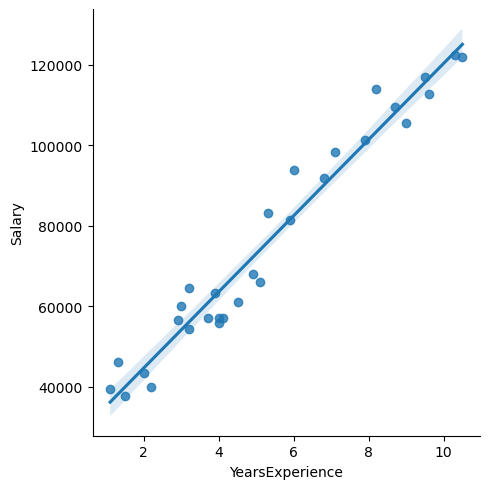

In [6]:
sns.lmplot(data=df, x = "YearsExperience", y = "Salary")

In [7]:
X = df.iloc[:, 0]
y = df.iloc[:, 1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

## Simple Linear Regression


In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
y_pred

array([100549.68910658,  55781.82221176, 116742.32181322,  73879.47053095,
       115789.81400695,  39589.18950513,  75784.48614349,  55781.82221176])

In [12]:
y_test

22    101302.0
7      54445.0
27    112635.0
16     66029.0
26    116969.0
2      37731.0
17     83088.0
8      64445.0
Name: Salary, dtype: float64

In [13]:
print("R2 {}".format(r2_score(y_test, y_pred)))
print("MSE {}".format(mean_squared_error(y_test, y_pred)))

R2 0.96289968418057
MSE 26761044.653350458


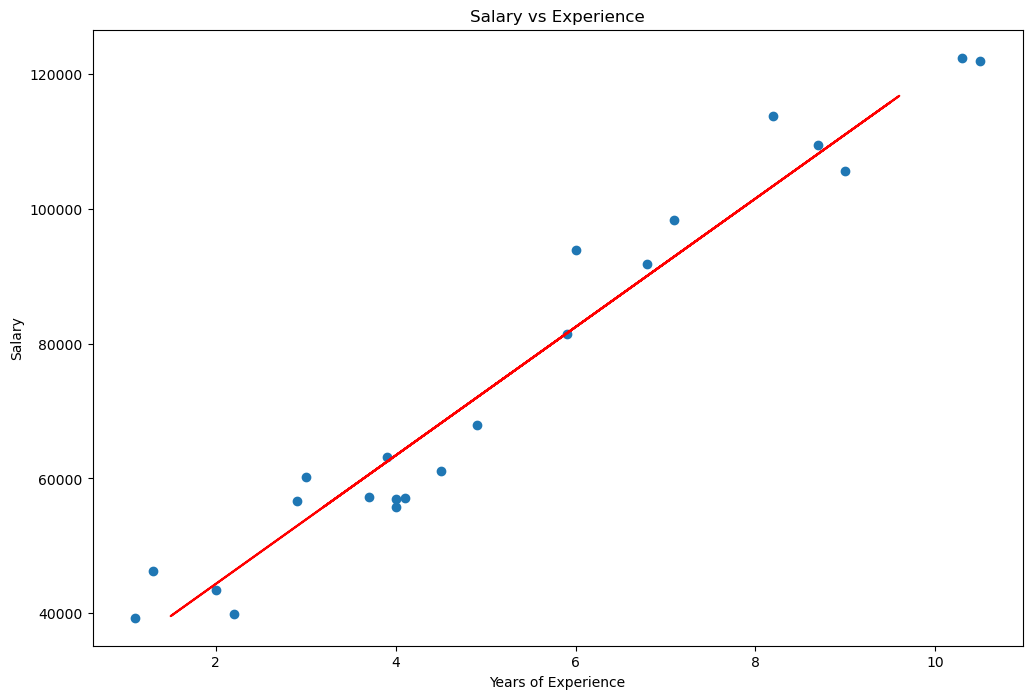

In [14]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()